In [51]:
#Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import geopandas as gpd
%matplotlib inline

In [52]:
#Load the dataset
df= pd.read_csv('zomato.csv', encoding= 'ISO-8859-1')

In [53]:
#show first five rows of the dataset
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In data analysis what all things we do
1.Missing Values
2.Explore about numerical variable
3.Explore about categorical variable
4.Finding relationship between features

In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<AxesSubplot: >

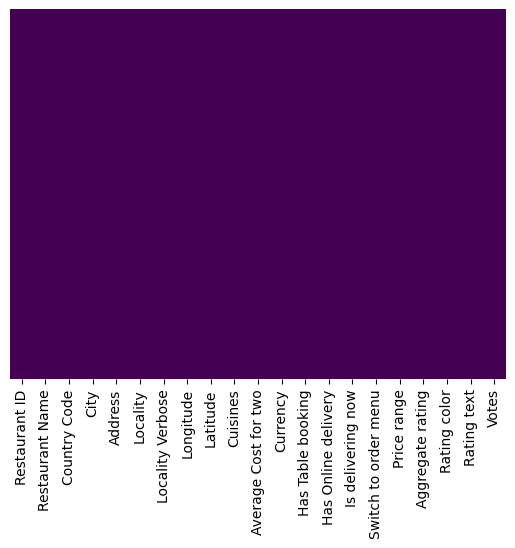

In [9]:
sns.heatmap(df.isnull(), yticklabels = False , cbar = False, cmap = 'viridis')

In [10]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [11]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [12]:
final_df = pd.merge(df,df_country, on='Country Code', how = 'left')

In [13]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [14]:
country_name = final_df.Country.value_counts().index

In [15]:
country_value = final_df.Country.value_counts().values

In [16]:
## Pie Chart

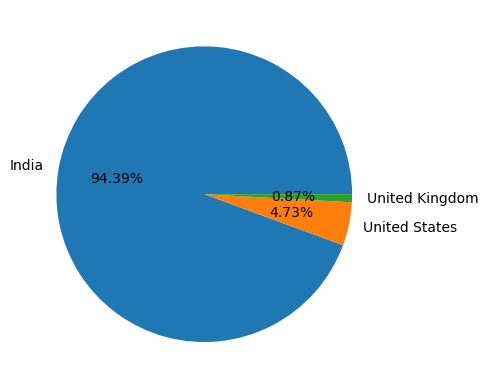

In [17]:
plt.pie(country_value[:3], labels=country_name[:3], autopct= '%1.2f%%')
plt.show()

Observation: Zomato maximum records or transaction are from India

In [18]:
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<AxesSubplot: xlabel='Aggregate rating', ylabel='Rating Count'>

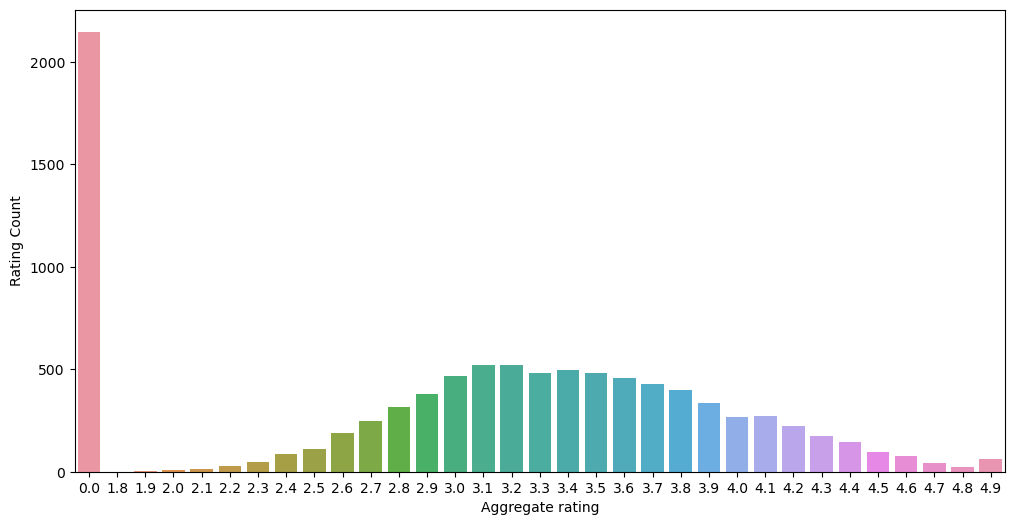

In [19]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating', y='Rating Count', data = ratings)

<AxesSubplot: xlabel='Aggregate rating', ylabel='Rating Count'>

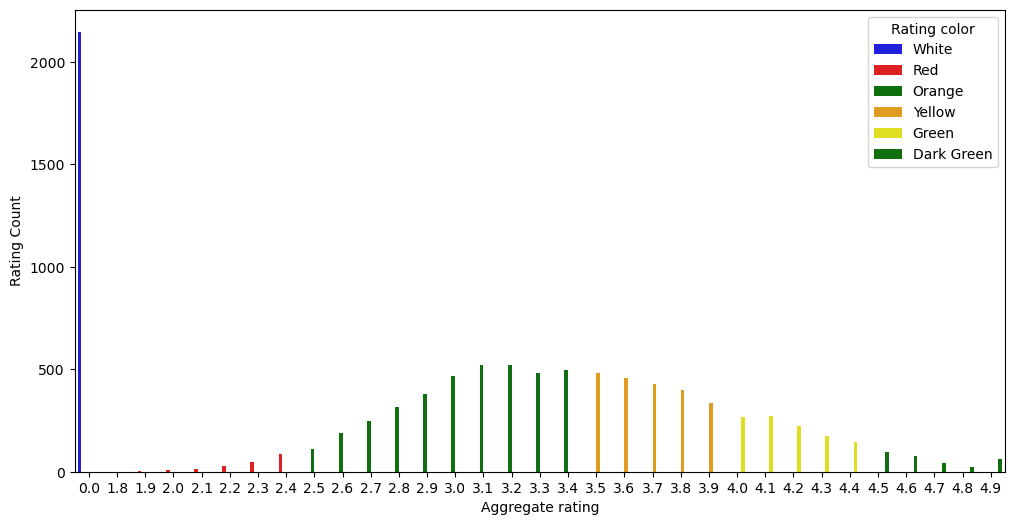

In [20]:
sns.barplot(x='Aggregate rating', y='Rating Count', data = ratings, hue = 'Rating color', palette=['blue', 'red', 'green', 'orange', 'yellow', 'green'])

#observation
1. Not rated count is very high
2. Maximum number of rating are between 2.5 to 3.4


<AxesSubplot: xlabel='Rating color', ylabel='count'>

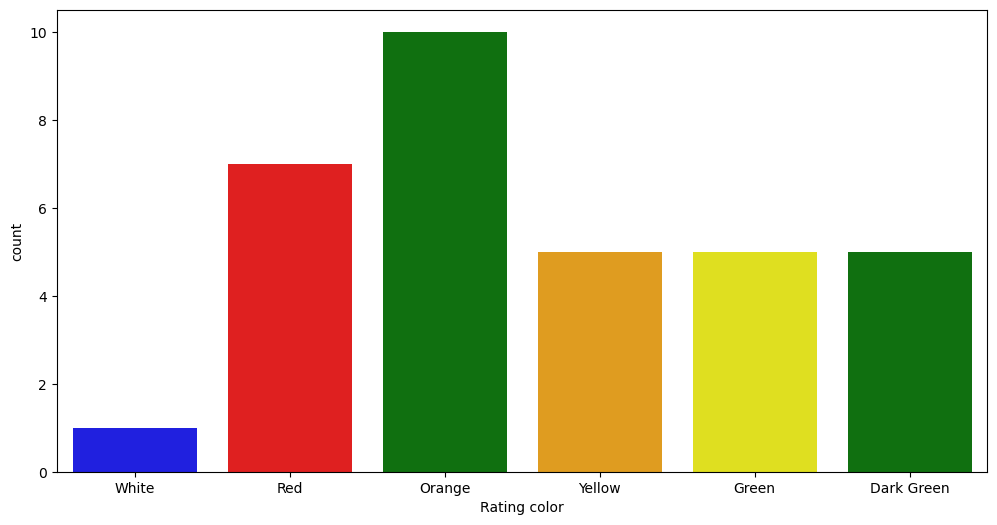

In [50]:
#A count plot that displays the frequency count of each unique value in the 'Rating color' column of the 'rating' Datafram. The color palette used for the bars on the plot is specified using palette parameter
sns.countplot(x = 'Rating color', data = ratings, palette= ['blue', 'red', 'green', 'orange', 'yellow', 'green'])

In [22]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [23]:
#find the country name which has given 0 ratings
final_df[final_df['Rating color'] == 'White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [24]:
final_df.groupby(['Aggregate rating', 'Country']).size().reset_index()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1
...,...,...,...
217,4.9,Sri Lanka,1
218,4.9,Turkey,3
219,4.9,UAE,4
220,4.9,United Kingdom,4


#Observation
1.Maximum number of 0 ratings are from indian customers

In [25]:
##find out which currency is used for which country
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [26]:
final_df[['Country', 'Currency']].groupby(['Country', 'Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [27]:
#Which countries do have online deliveries option
final_df[['Country', 'Has Online delivery']].groupby(['Country', 'Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [49]:
#the frequency count of the countries represented in the final_df DataFrame where the 'Has Online delivery' column equals 'Yes'.
final_df[final_df['Has Online delivery'] == 'Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

#Observations
online delievery is available in india and UAE

In [29]:
#Value count for city column
final_df.City.value_counts().index  

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

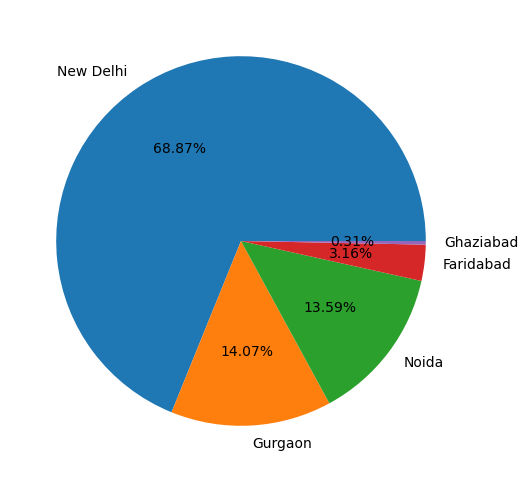

In [48]:
#a pie chart of the top 5 cities represented in the 'City' column 
city_value = final_df.City.value_counts().values
city_label = final_df.City.value_counts().index

plt.pie(city_value[:5], labels=city_label[:5], autopct='%1.2f%%')
plt.show()

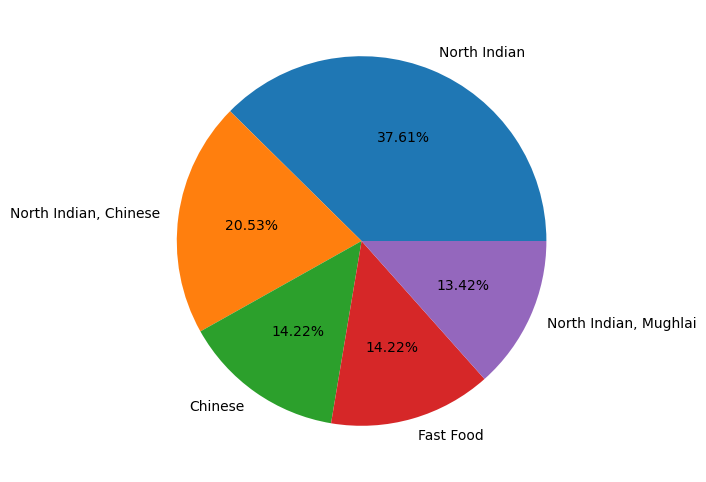

In [47]:
# a pie chart of the top 5 cuisines represented in the 'Cuisines' column 
cusine_value = final_df.Cuisines.value_counts().values
cusine_label = final_df.Cuisines.value_counts().index

plt.pie(cusine_value[:5], labels=cusine_label[:5], autopct='%1.2f%%')
plt.show()

In [32]:
# Group the dataset by city and calculate the average rating for each city
city_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index()

# Sort the cities by their average rating in descending order
city_ratings = city_ratings.sort_values('Aggregate rating', ascending=False)

Text(0.5, 1.0, 'Average Rating by City')

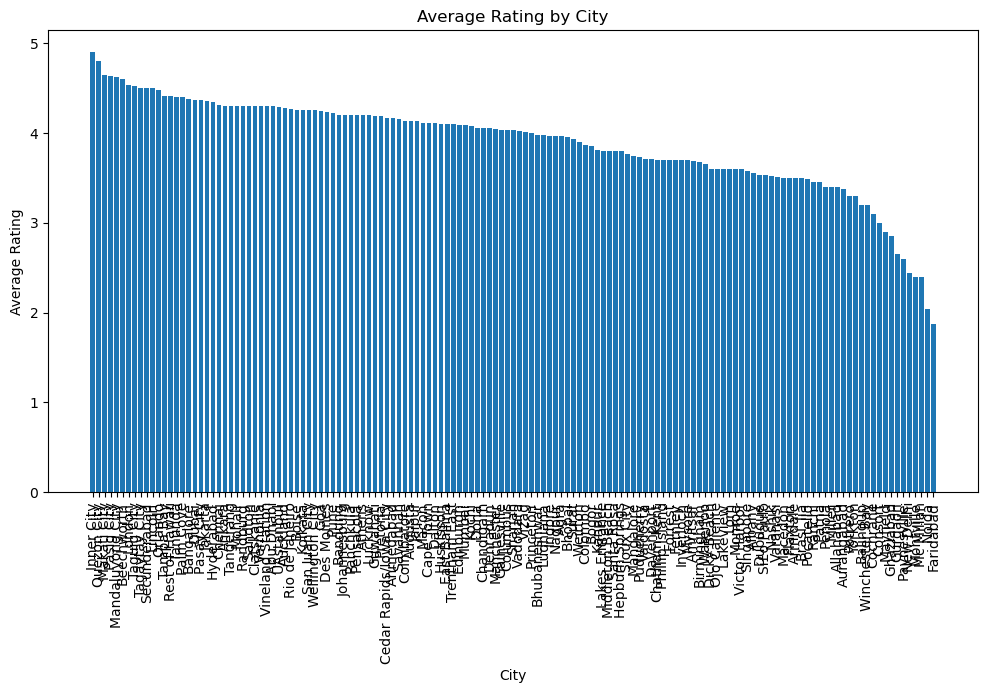

In [33]:
# Plot a bar chart of the average rating for each city
plt.bar(city_ratings['City'], city_ratings['Aggregate rating'])
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average Rating by City')

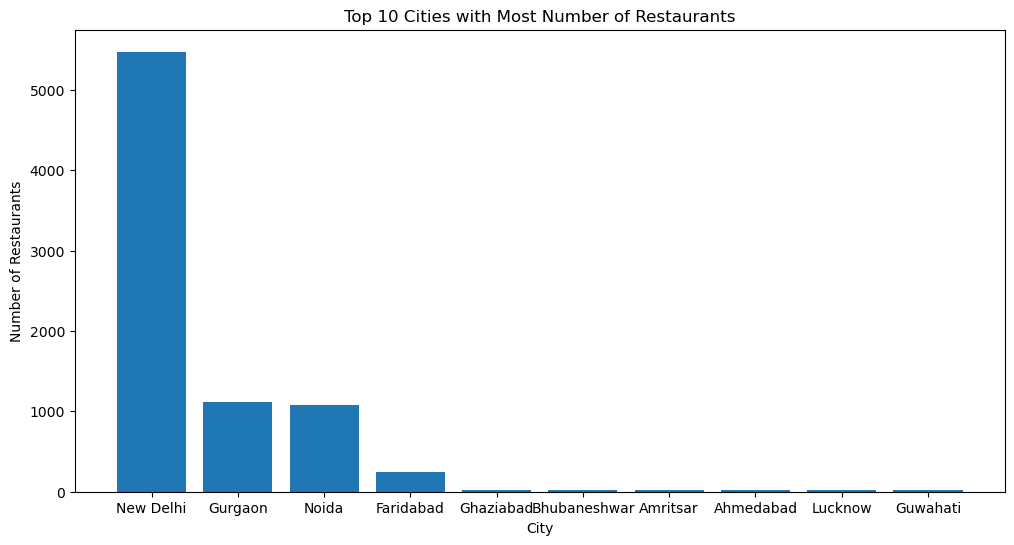

In [34]:
# Create a bar chart of the top 10 cities with the most number of restaurants
top_cities = df['City'].value_counts().nlargest(10)
plt.bar(top_cities.index, top_cities.values)
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Top 10 Cities with Most Number of Restaurants')

# Display the plot
plt.show()



Text(0.5, 1.0, 'Top 5 Cuisines in Each City')

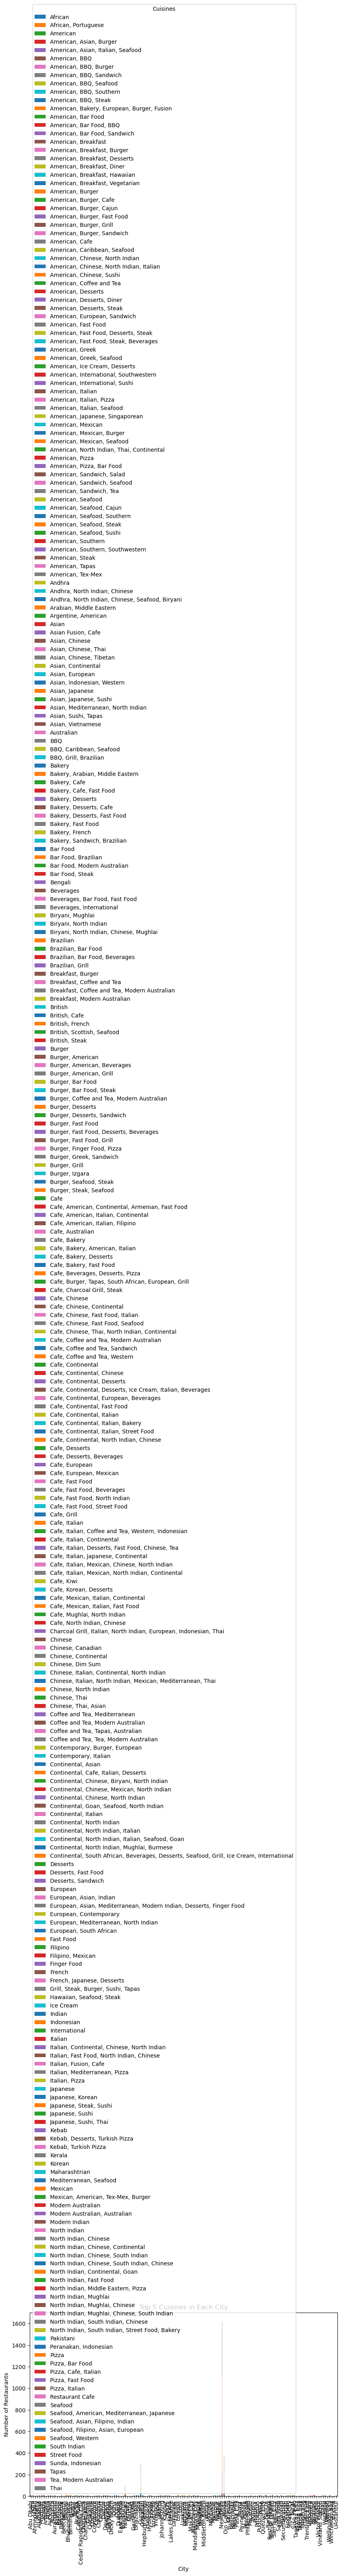

In [35]:
# Create a stacked bar chart of the top 5 cuisines in each city
top_cuisines = df.groupby(['City', 'Cuisines']).size().reset_index(name='Count')
top_cuisines = top_cuisines.sort_values(['City', 'Count'], ascending=False)
top_cuisines = top_cuisines.groupby('City').head(5)
top_cuisines_pivot = top_cuisines.pivot(index='City', columns='Cuisines', values='Count')
top_cuisines_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Top 5 Cuisines in Each City')

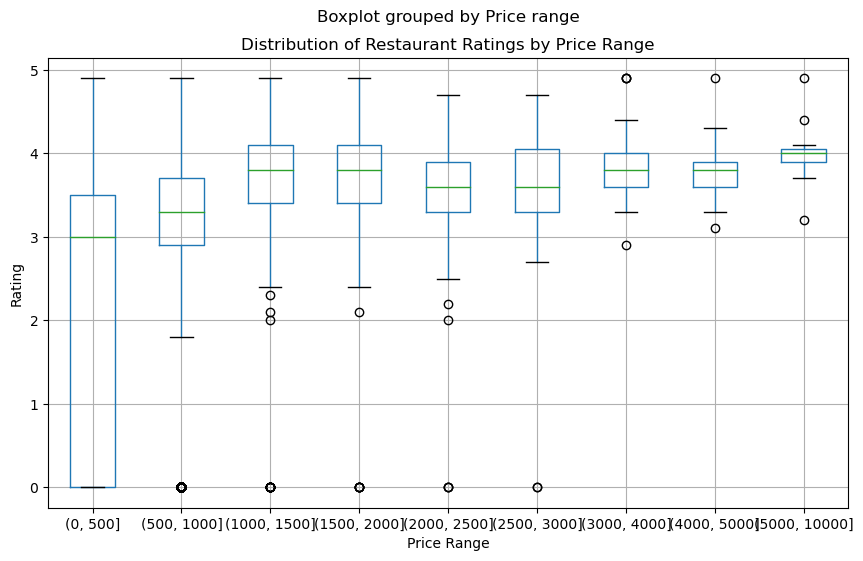

In [36]:
# Create a boxplot of the distribution of restaurant ratings by price range
df['Price range'] = pd.cut(df['Average Cost for two'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 10000])
df.boxplot(column='Aggregate rating', by='Price range', figsize=(10, 6))
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.title('Distribution of Restaurant Ratings by Price Range')

# Display the plot
plt.show()

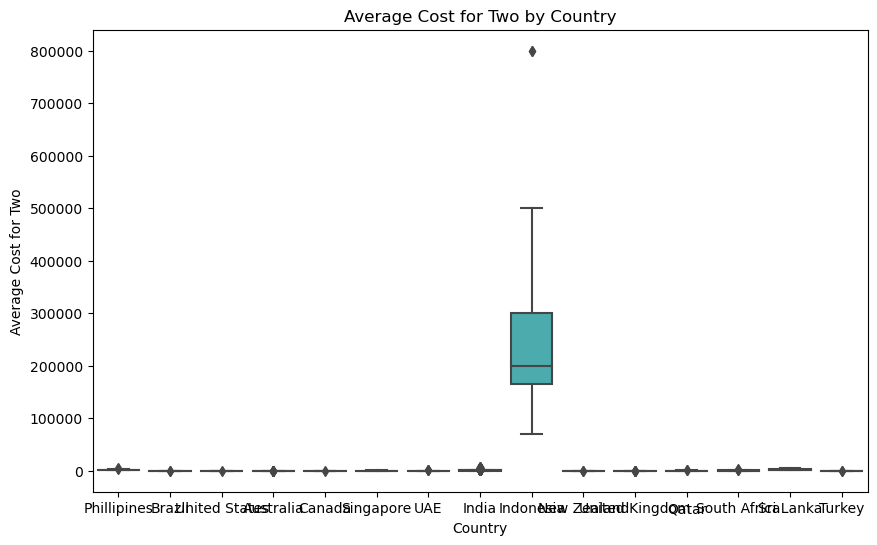

In [40]:
# create a box plot of the average cost for two by country
plt.figure(figsize=(10,6))
sns.boxplot(x='Country', y='Average Cost for two', data=final_df)
plt.title('Average Cost for Two by Country')
plt.xlabel('Country')
plt.ylabel('Average Cost for Two')
plt.show()


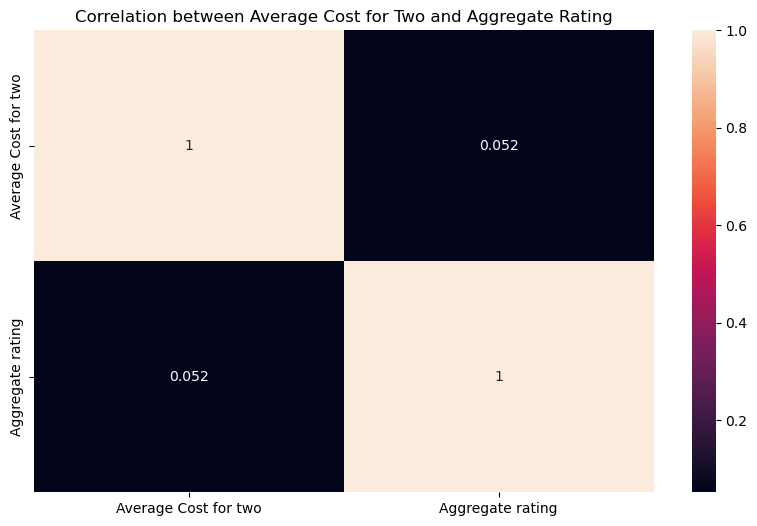

In [41]:
# create a heatmap of the correlation between average cost for two and aggregate rating
plt.figure(figsize=(10,6))
sns.heatmap(df[['Average Cost for two', 'Aggregate rating']].corr(), annot=True)
plt.title('Correlation between Average Cost for Two and Aggregate Rating')
plt.show()

This code creates a bubble chart that shows the relationship between the aggregate rating, number of votes, and average cost for two. The x-axis represents the aggregate rating, the y-axis represents the number of votes, and the size of each bubble represents the average cost for two.

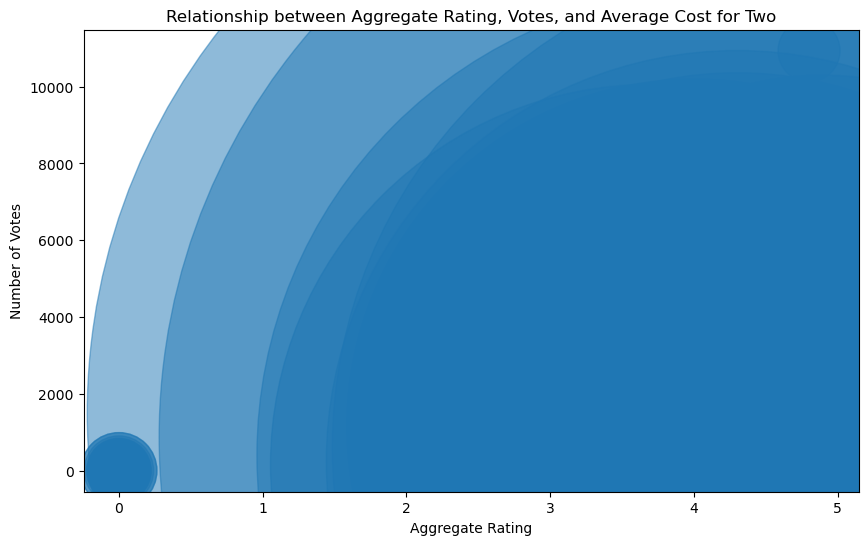

In [42]:
# create a bubble chart of the relationship between aggregate rating, number of votes, and average cost for two
plt.figure(figsize=(10,6))
plt.scatter(x=df['Aggregate rating'], y=df['Votes'], s=df['Average Cost for two'], alpha=0.5)
plt.title('Relationship between Aggregate Rating, Votes, and Average Cost for Two')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Votes')
plt.show()

This creates a word cloud that shows the most common cuisines in the dataset.

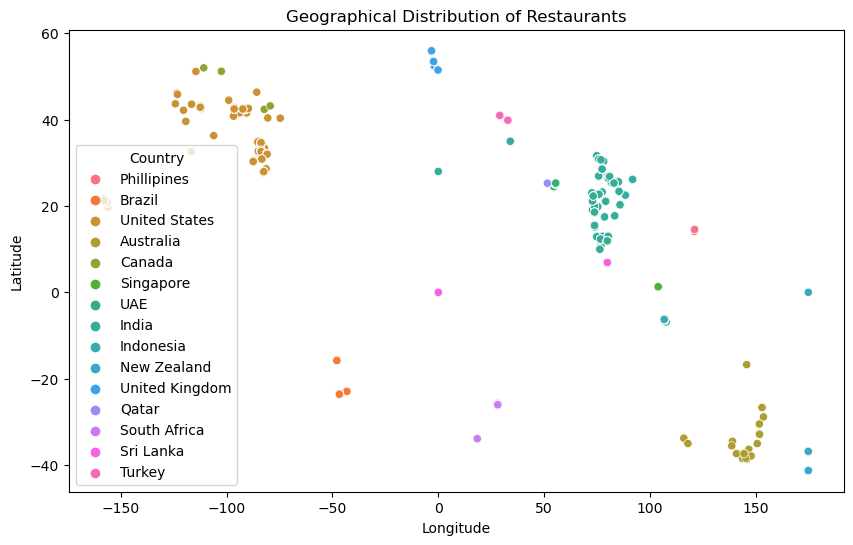

In [44]:
# create a scatter plot of the restaurants on a map
plt.figure(figsize=(10,6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Country', data=final_df)
plt.title('Geographical Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


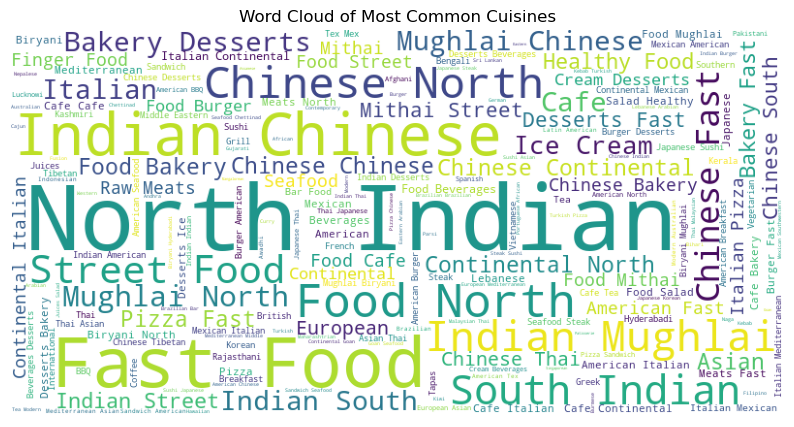

In [45]:
# create a word cloud of the most common cuisines
cuisine_text = ' '.join(df['Cuisines'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cuisine_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Most Common Cuisines')
plt.show()

<Figure size 1000x600 with 0 Axes>

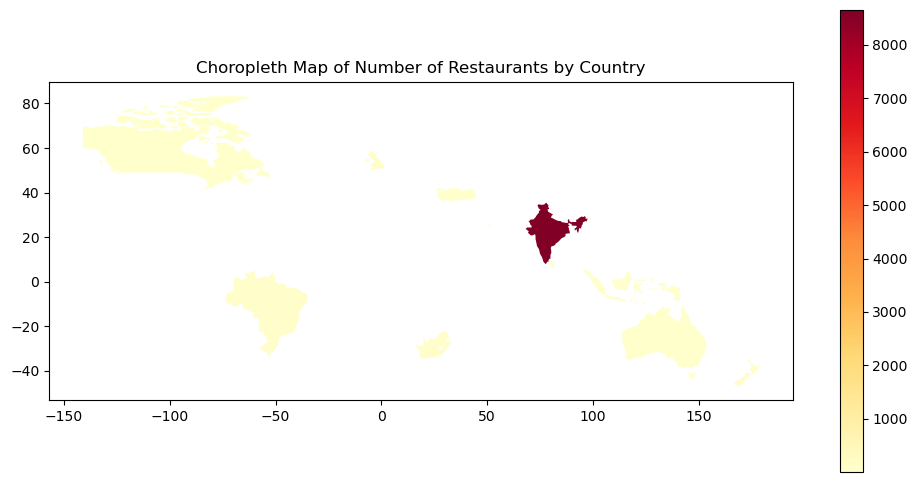

In [46]:
# load a shapefile of world countries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# group the restaurants by country and count the number of restaurants
country_counts = final_df.groupby('Country')['Restaurant ID'].count().reset_index()
country_counts.columns = ['name', 'count']

# merge the restaurant counts with the world shapefile
world = world.merge(country_counts, on='name')

# create a choropleth map of the number of restaurants by country
plt.figure(figsize=(10,6))
world.plot(column='count', cmap='YlOrRd', legend=True)
plt.title('Choropleth Map of Number of Restaurants by Country')
plt.show()